## Should the company sell its software for 39 or 59?

#### 1.Data Summary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import time
import datetime

In [4]:
user=pd.read_csv('user_table.csv')
test=pd.read_csv('test_results.csv')

In [5]:
user.head()

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68


In [6]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275616 entries, 0 to 275615
Data columns (total 5 columns):
user_id    275616 non-null int64
city       275616 non-null object
country    275616 non-null object
lat        275616 non-null float64
long       275616 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 10.5+ MB


In [7]:
test.head()

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 8 columns):
user_id             316800 non-null int64
timestamp           316800 non-null object
source              316800 non-null object
device              316800 non-null object
operative_system    316800 non-null object
test                316800 non-null int64
price               316800 non-null int64
converted           316800 non-null int64
dtypes: int64(4), object(4)
memory usage: 19.3+ MB


In [9]:
data=pd.merge(test, user, how='left', left_on='user_id',right_on='user_id')

In [10]:
data[['price', 'test', 'user_id']].groupby(['test', 'price']).count()

user_id
test price         
0    39      202517
     59         210
1    39         155
     59      113918

In [11]:
#delete the data that price not match to the test
data=data[((data.test==0)&(data.price==39))|((data.test==1)&(data.price==59))]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316435 entries, 0 to 316799
Data columns (total 12 columns):
user_id             316435 non-null int64
timestamp           316435 non-null object
source              316435 non-null object
device              316435 non-null object
operative_system    316435 non-null object
test                316435 non-null int64
price               316435 non-null int64
converted           316435 non-null int64
city                275294 non-null object
country             275294 non-null object
lat                 275294 non-null float64
long                275294 non-null float64
dtypes: float64(2), int64(4), object(6)
memory usage: 31.4+ MB


In [12]:
data['revenue']=data['price']*data['converted']

In [13]:
def get_date(date):
    try:
        year = pd.to_datetime(date).year
    except:
        year = date[:4]
    return year

In [14]:
def get_date2(date):
    try:
        month = pd.to_datetime(date).month
    except:
        month = int(date[5:7])
    return month

In [15]:
def get_date3(date):
    try:
        day = pd.to_datetime(date).day
    except:
        day = int(date[8:10])
    return day

In [16]:
data['year'] = data['timestamp'].map(get_date)
data['month'] = data['timestamp'].map(get_date2)
data['day'] = data['timestamp'].map(get_date3)

In [17]:
data.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long,revenue,year,month,day
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86,0,2015,5,8
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24,0,2015,5,10
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73,0,2015,4,4
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90,0,2015,5,7
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02,0,2015,5,24


In [18]:
data=data.drop(['user_id','country','lat','long','year','timestamp'],axis=1)
# delete the useless columns

In [19]:
data.month.value_counts()

5    113842
4    101949
3    100644
Name: month, dtype: int64

#### 2.Data Visualization

In [20]:
data.groupby('price')['converted'].mean()

price
39    0.019900
59    0.015555
Name: converted, dtype: float64

In [207]:
data.groupby('price')['revenue'].mean()

price
39    0.776083
59    0.917748
Name: revenue, dtype: float64

For those with lower price $\$39$, they have a higher conversion rate $1.990\%$. For those with higher price $\$59$, the conversion rate is $1.556\%$. However, considering the price, the average revenue for higher price $0.918$ is actually larger than the lower price $0.776$.

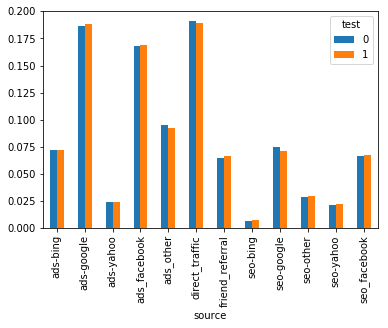

In [208]:
data.groupby(['test'])['source'].value_counts(normalize=True).unstack(0).plot(kind='bar')
plt.show()

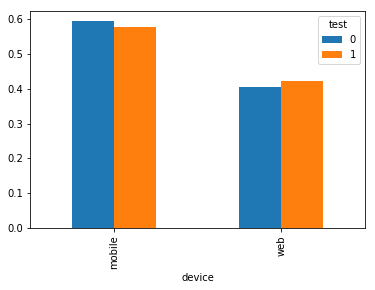

In [209]:
data.groupby('test')['device'].value_counts(normalize=True).unstack(0).plot(kind='bar')
plt.show()

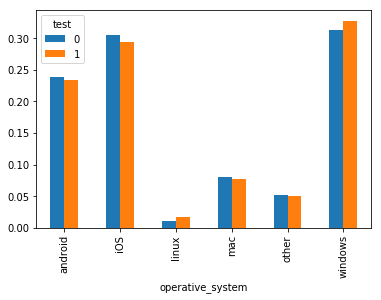

In [210]:
data.groupby('test')['operative_system'].value_counts(normalize=True).unstack(0).plot(kind='bar')
plt.show()

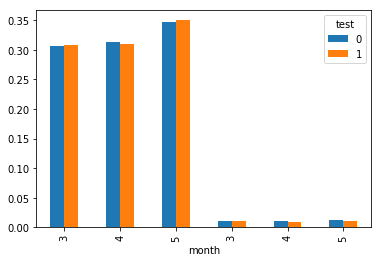

In [211]:
data.groupby('test')['month'].value_counts(normalize=True).unstack(0).plot(kind='bar')
plt.show()

In [237]:
data.groupby('test')['month'].value_counts(normalize=True)

test  month
0     5        0.358903
      4        0.323815
      3        0.317282
1     5        0.361295
      3        0.319432
      4        0.319274
Name: month, dtype: float64

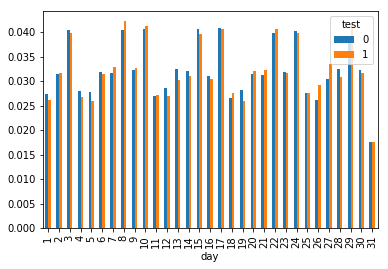

In [238]:
data.groupby('test')['day'].value_counts(normalize=True).unstack(0).plot(kind='bar')
plt.show()

From the plots above, we can notice that the two subset for A/B test is not strictly splited equally.

In [213]:
ctr_val = data[data['test'] == 0]['revenue'].values
exp_val = data[data['test'] == 1]['revenue'].values
print(ttest_ind(ctr_val, exp_val, axis=0, equal_var=False))

Ttest_indResult(statistic=-5.7152246664631079, pvalue=1.0972577312420781e-08)


H0: experimental group's average revenue is equal to or less than control group's average revenue; while the alternative hypothesis H1: experimental group's average revenue is higher than control group's average revenue. We can conclude that we can reject the null hypothesis with the p-value is less than 0.05, and conclude that experimental group's average revenue is higher than control group's average revenue. 
Although $\$59$ price can provide higher revenue. However, due to the problem with the A/B test, the above result is not scientifically accurate.

## The VP of Product is interested in having a holistic view into user behavior, especially focusing on actionable insights that might increase conversion rate. What are your main findings looking at the data?


In [214]:
data.head()

,source,device,operative_system,test,price,converted,city,revenue,month,day
0,ads_facebook,mobile,iOS,0,39,0,Buffalo,0,5,8
1,seo-google,mobile,android,0,39,0,Lakeville,0,5,10
2,ads-bing,mobile,android,0,39,0,Parma,0,4,4
3,direct_traffic,mobile,iOS,1,59,0,Fayetteville,0,5,7
4,ads_facebook,web,mac,0,39,0,Fishers,0,5,24


In [215]:
data.groupby('source')['converted'].mean()

source
ads-bing           0.012001
ads-google         0.021502
ads-yahoo          0.014793
ads_facebook       0.021198
ads_other          0.014350
direct_traffic     0.012294
friend_referral    0.038688
seo-bing           0.023787
seo-google         0.016978
seo-other          0.015686
seo-yahoo          0.016226
seo_facebook       0.016051
Name: converted, dtype: float64

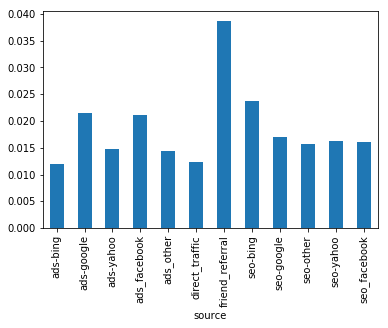

In [243]:
data.groupby('source')['converted'].mean().plot(kind='bar')
plt.show()

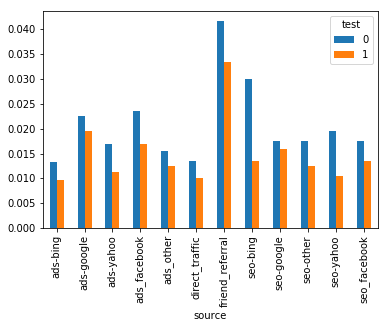

In [248]:
data.groupby(['test','source'])['converted'].mean().unstack(0).plot(kind='bar')
plt.show()

people from friend_referal with the highest converted rate.

In [249]:
data.groupby('device')['converted'].mean()

device
mobile    0.018554
web       0.018023
Name: converted, dtype: float64

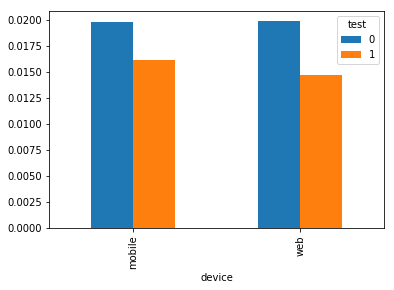

In [251]:
data.groupby(['test','device'])['converted'].mean().unstack(0).plot(kind='bar')
plt.show()

In [175]:
data.groupby('operative_system')['converted'].mean()

operative_system
android    0.014919
iOS        0.022328
linux      0.008232
mac        0.023987
other      0.012981
windows    0.016966
Name: converted, dtype: float64

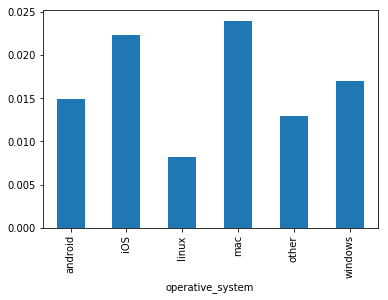

In [252]:
data.groupby('operative_system')['converted'].mean().plot(kind='bar')
plt.show()

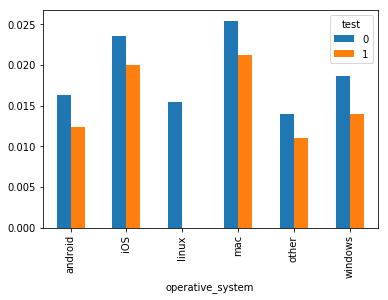

In [253]:
data.groupby(['test','operative_system'])['converted'].mean().unstack(0).plot(kind='bar')
plt.show()

The mac and IOS users have higher converted rate. And after changing the price, the converted rate of linux users turns to zero.

In [254]:
data.groupby('month')['converted'].mean()

month
3    0.018382
4    0.018509
5    0.018139
Name: converted, dtype: float64

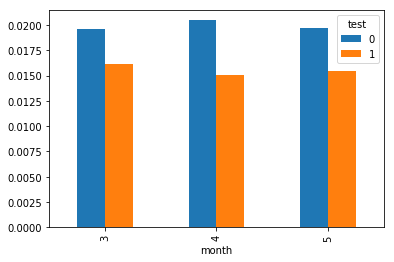

In [255]:
data.groupby(['test','month'])['converted'].mean().unstack(0).plot(kind='bar')
plt.show()

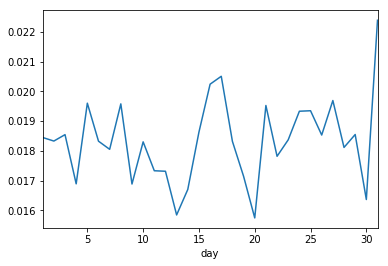

In [256]:
data.groupby('day')['converted'].mean().plot()
plt.show()

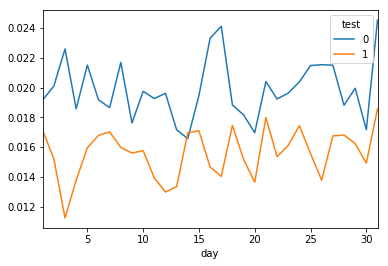

In [258]:
data.groupby(['test','day'])['converted'].mean().unstack(0).plot()
plt.show()

In [188]:
data.groupby('city')['converted'].mean().sort_values(ascending=False)

city
North Atlanta                     0.200000
Catonsville                       0.153846
Saint Charles                     0.142857
Parkway-South Sacramento          0.117647
Findlay                           0.111111
Blue Springs                      0.095238
Bonita Springs                    0.090909
Lehigh Acres                      0.086957
Parsippany-Troy Hills Township    0.081081
Sun City                          0.078652
Montebello                        0.071429
West Des Moines                   0.068966
Kettering                         0.068493
Great Falls                       0.065217
Valdosta                          0.064516
North Bethesda                    0.058824
Littleton                         0.058824
Lorain                            0.057143
Bremerton                         0.056604
Encinitas                         0.055556
Hilo                              0.055556
Springdale                        0.055556
Kokomo                            0.054545
Sterli

From above visualizations, we can conclude that price dramatically influence the conversion rate. But beside price, there are still other factors that can influence the conversion rate. Firstly, friend-referral users have much higher conversion rate. Then, the influence of device and month is not significant. As for operative system, Mac and ios users have much higher conversion rate and linux users have the almost lowest conversion rate, especially in high price.

Therefore, we should focus on the Apple users (MAC or iOS users) and run some program which rewards user which can invite his/her friend to use our software. In addition, fixing the problems which the linux users face such as incompatibility issue is needed.

## [Bonus] The VP of Product feels that the test has been running for too long and he should have been able to get statistically significant results in a shorter time. Do you agree with her intuition? After how many days you would have stopped the test? Please, explain why.

I agree with that, since the influence of month is not significant, we can just stop the test in 28-30 days.